In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data_related', index_col = 0)
export_name = 'data_related_with_competencies'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   School           94 non-null     object 
 1   Course           94 non-null     object 
 2   Degree_type      94 non-null     object 
 3   Pace             81 non-null     object 
 4   Mode             92 non-null     object 
 5   Country          94 non-null     object 
 6   City             94 non-null     object 
 7   Continent        94 non-null     object 
 8   Duration_years   94 non-null     float64
 9   InEnglish        94 non-null     bool   
 10  Lang_primary     94 non-null     object 
 11  Introduction     94 non-null     object 
 12  Curriculum       42 non-null     object 
 13  Careers          33 non-null     object 
 14  Program_outcome  17 non-null     object 
 15  Merged_desc      94 non-null     object 
 16  Norm_sents       94 non-null     object 
dtypes: bool(1), float6

In [5]:
df.isna().sum()/len(df)

School             0.000000
Course             0.000000
Degree_type        0.000000
Pace               0.138298
Mode               0.021277
Country            0.000000
City               0.000000
Continent          0.000000
Duration_years     0.000000
InEnglish          0.000000
Lang_primary       0.000000
Introduction       0.000000
Curriculum         0.553191
Careers            0.648936
Program_outcome    0.819149
Merged_desc        0.000000
Norm_sents         0.000000
dtype: float64

In [6]:
from ast import literal_eval
df['Norm_sents'] = df['Norm_sents'].apply(literal_eval)

In [7]:
df.head(3)

,School,Course,Degree_type,Pace,Mode,Country,City,Continent,Duration_years,InEnglish,Lang_primary,Introduction,Curriculum,Careers,Program_outcome,Merged_desc,Norm_sents
0,GISMA University of Applied Science,"BSc Data Science, AI & Digital Business",BSc,Full-time,Campus,Germany,Berlin,Europe,3.0,True,English,Apply Now This unique combination of business ...,### Curriculum#### How will you study?GISMA Bu...,NaN,### Program Outcome#### **What will you learn?...,Apply Now This unique combination of business ...,[apply unique combination business technology ...
1,University of Europe for Applied Sciences,B.Sc. Digital Business & Data Science,BSc,Full-time,Campus,Germany,Hamburg,Europe,3.0,True,English,Learn how to apply cutting-edge analytics tool...,NaN,NaN,NaN,Learn how to apply cutting-edge analytics tool...,[learn apply cut edge analytics tool big data ...
2,Harbour.Space University,Bachelor of Data Science,Bachelor,Full-time,Campus,Spain,Barcelona,Europe,3.0,True,English,This program is taught in ENGLISH. The Data Sc...,### Curriculum#### First YearIn the first year...,NaN,NaN,This program is taught in ENGLISH. The Data Sc...,"[program teach english, data science bachelor ..."


# Most common with NLTK
counts somehow different....

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams, ngrams
from nltk.probability import FreqDist

In [9]:
list_of_desc = []
for i in range(0, len(df)):
    list_of_desc.append(''.join(df['Norm_sents'][i]))
    
norm_text = ''.join(list_of_desc)

In [10]:
#FreqDist(word_tokenize(norm_text)).most_common(10)
#FreqDist(nltk.bigrams(word_tokenize(norm_text))).most_common(10)
#FreqDist(nltk.trigrams(word_tokenize(norm_text))).most_common(10)
#FreqDist(nltk.ngrams(word_tokenize(norm_text),4)).most_common(10)

# Most common - CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
def get_most_common_with_stop(corpus, ngrams):
    cv = CountVectorizer(max_df=0.95, min_df=2, ngram_range=ngrams, analyzer='word')
    bow= cv.fit_transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq

In [13]:
def get_most_common(corpus, ngrams):
    cv = CountVectorizer(max_df=0.95, min_df=2, ngram_range=ngrams, analyzer='word',stop_words = 'english')
    bow= cv.fit_transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq

In [104]:
def plot_counts(list_of_tuples, num_of_words, title):
    counts = pd.DataFrame(list_of_tuples, 
                          columns = ["Token", 'Count'])
    p = sns.barplot(x = 'Token', y = 'Count', data = counts[:num_of_words],
                    palette = 'tab20')
    plt.xticks(rotation=55, horizontalalignment = 'right')
    p.set_xlabel('Most common tokens')
    p.set_ylabel('Number of occurences')
    plt.title(title)
    plt.show()

In [15]:
get_most_common_with_stop(df['Merged_desc'],(1,1))[:10]

[('data', 1207),
 ('you', 571),
 ('for', 503),
 ('science', 465),
 ('with', 465),
 ('will', 394),
 ('is', 389),
 ('business', 326),
 ('as', 315),
 ('students', 314)]

In [16]:
get_most_common_with_stop(df['Merged_desc'],(2,3))[:10]

[('data science', 300),
 ('in the', 268),
 ('of the', 240),
 ('you will', 132),
 ('of data', 123),
 ('data analytics', 120),
 ('will be', 101),
 ('and data', 98),
 ('introduction to', 97),
 ('big data', 95)]

In [88]:
get_most_common_with_stop(df['Merged_desc'],(1,3))[:15]

[('data', 1207),
 ('you', 571),
 ('for', 503),
 ('science', 465),
 ('with', 465),
 ('will', 394),
 ('is', 389),
 ('business', 326),
 ('as', 315),
 ('students', 314),
 ('data science', 300),
 ('year', 293),
 ('analytics', 282),
 ('or', 269),
 ('are', 269)]

In [99]:
unigrams = get_most_common(df['Merged_desc'],(1,1))
unigrams[:10]

[('data', 1207),
 ('science', 465),
 ('business', 326),
 ('students', 314),
 ('year', 293),
 ('analytics', 282),
 ('skills', 239),
 ('program', 234),
 ('learning', 211),
 ('management', 196)]

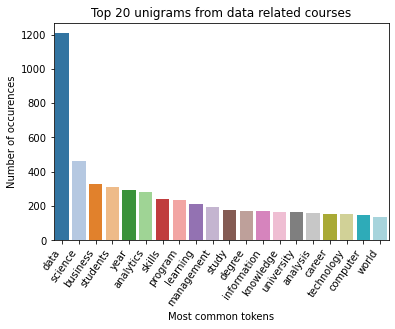

In [105]:
plot_counts(unigrams, 20, title = 'Top 20 unigrams from data related courses')

In [107]:
bigrams = get_most_common(df['Merged_desc'],(2,2))
bigrams[:10]

[('data science', 300),
 ('data analytics', 123),
 ('big data', 95),
 ('machine learning', 89),
 ('artificial intelligence', 80),
 ('computer science', 68),
 ('data analysis', 60),
 ('career opportunities', 52),
 ('information technology', 43),
 ('data scientist', 43)]

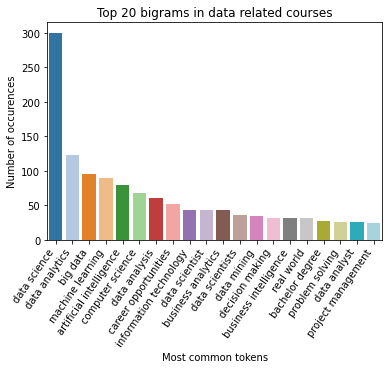

In [108]:
plot_counts(bigrams,20, 'Top 20 bigrams in data related courses')

In [21]:
trigrams = get_most_common(df['Merged_desc'],(3,3))
trigrams[:10]

[('course content year', 18),
 ('data science analytics', 13),
 ('data science ai', 12),
 ('mathematics computer science', 12),
 ('intelligence machine learning', 11),
 ('career opportunities career', 11),
 ('big data analytics', 11),
 ('data science program', 10),
 ('data science techniques', 10),
 ('learning artificial intelligence', 10)]

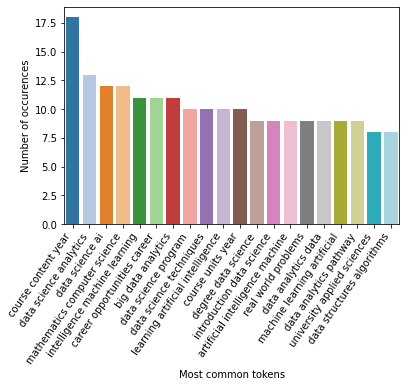

In [22]:
plot_counts(trigrams,20)

In [23]:
ngrams = get_most_common(df['Merged_desc'],(3,4))
ngrams[:10]

[('course content year', 18),
 ('data science analytics', 13),
 ('data science ai', 12),
 ('mathematics computer science', 12),
 ('intelligence machine learning', 11),
 ('career opportunities career', 11),
 ('big data analytics', 11),
 ('data science program', 10),
 ('data science techniques', 10),
 ('learning artificial intelligence', 10)]

# TF- IDF

In [112]:
from sklearn.feature_extraction.text import TfidfTransformer
def counts_tfidf_df(corpus, ngrams):
    cv = CountVectorizer(max_df=0.95, min_df=2, ngram_range= ngrams, analyzer='word',stop_words = 'english')
    bow_counts = cv.fit_transform(corpus)
    sum_words = bow_counts.sum(axis=0) 
    df = pd.DataFrame([(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()], 
                      index = [idx for word,idx in cv.vocabulary_.items()],
                      columns = ['Phrase', 'Count'])
    
    tfidf_transformer = TfidfTransformer(use_idf=True) #default True
    tfidf = tfidf_transformer.fit_transform(bow_counts)
    df = df.join(pd.DataFrame(tfidf_transformer.idf_))
    
    df.columns = ['Phrase', 'Count', 'TF_IDF']
    
    return df

In [113]:
tf_idf_unigrams = counts_tfidf_df(df['Merged_desc'], (1,1))
tf_idf_unigrams.shape

(2254, 3)

In [114]:
tf_idf_unigrams.sort_values(by = 'Count', ascending = False)[:10]

,Phrase,Count,TF_IDF
581,data,1207,1.054067
1837,science,465,1.210071
318,business,326,1.379490
2007,students,314,1.263417
2247,year,293,1.725235
172,analytics,282,1.493434
1910,skills,239,1.223144
1649,program,234,1.510826
1240,learning,211,1.394994
1305,management,196,1.476339


In [115]:
tf_idf_unigrams.sort_values(by = 'TF_IDF', ascending = False)[:10]

,Phrase,Count,TF_IDF
621,deploy,2,4.455265
986,globe,3,4.455265
835,exclusive,2,4.455265
1226,largely,2,4.455265
2204,vocational,3,4.455265
1417,netherlands,3,4.455265
386,cios,2,4.455265
216,asa,2,4.455265
1750,registered,2,4.455265
1462,operates,2,4.455265


In [116]:
tf_idf_bigrams = counts_tfidf_df(df['Merged_desc'], (2,2))
tf_idf_bigrams.shape

(2712, 3)

In [117]:
tf_idf_bigrams.sort_values(by = 'Count', ascending = False)[:10]

,Phrase,Count,TF_IDF
650,data science,300,1.426743
601,data analytics,123,1.998529
326,big data,95,1.769687
1433,machine learning,89,1.725235
274,artificial intelligence,80,2.119890
495,computer science,68,1.942959
597,data analysis,60,1.840305
398,career opportunities,52,1.864997
652,data scientist,43,2.119890
1191,information technology,43,2.509354


In [30]:
tf_idf_bigrams.sort_values(by = 'TF_IDF', ascending = False)[:10]

,Phrase,Count,TF_IDF
914,evaluatethe effectiveness,2,4.455265
2489,tools including,2,4.455265
1268,introductory courses,2,4.455265
1297,knowledge decision,2,4.455265
1403,level higher,3,4.455265
462,companies like,2,4.455265
1439,major provides,2,4.455265
1887,provides knowledge,2,4.455265
1605,new challenges,2,4.455265
1958,required courses,2,4.455265


In [127]:
tf_idf_ngrams = counts_tfidf_df(df['Merged_desc'], (2,3))
tf_idf_ngrams.shape

(3977, 3)

In [128]:
tf_idf_ngrams.sort_values(by = 'Count', ascending = False)[:10]

,Phrase,Count,TF_IDF
993,data science,300,1.426743
910,data analytics,123,1.998529
467,big data,95,1.769687
2130,machine learning,89,1.725235
390,artificial intelligence,80,2.119890
731,computer science,68,1.942959
896,data analysis,60,1.840305
583,career opportunities,52,1.864997
1035,data scientist,43,2.119890
1793,information technology,43,2.509354


In [129]:
tf_idf_ngrams.sort_values(by = 'TF_IDF', ascending = False)[:10]

,Phrase,Count,TF_IDF
204,analyse networks ofrelationships,2,4.455265
2634,probability programming,2,4.455265
54,50 000,2,4.455265
3040,science professional,2,4.455265
1326,end program,2,4.455265
3390,student able,2,4.455265
3619,theory mathematical,2,4.455265
504,build statistical,2,4.455265
1207,different fields,2,4.455265
3245,software programming,2,4.455265


# Part of Speech tags

In [34]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [35]:
doc = nlp(' '.join([i for i in df['Merged_desc']]))

In [36]:
POS_counts = doc.count_by(spacy.attrs.POS)

for k,v in sorted(POS_counts.items(), key = lambda x: x[1], reverse=True):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

92. NOUN : 14718
96. PROPN: 9211
97. PUNCT: 7356
85. ADP  : 5969
100. VERB : 5151
84. ADJ  : 4396
90. DET  : 3619
89. CCONJ: 2930
95. PRON : 2026
87. AUX  : 1781
93. NUM  : 1421
94. PART : 1118
86. ADV  : 1073
98. SCONJ: 412
99. SYM  : 137
103. SPACE: 77
101. X    : 58
91. INTJ : 9


In [37]:
doc2 = nlp(norm_text)

In [38]:
POS_counts2 = doc2.count_by(spacy.attrs.POS)

for k,v in sorted(POS_counts2.items(), key = lambda x: x[1], reverse=True):
    print(f'{k}. {doc2.vocab[k].text:{5}}: {v}')

92. NOUN : 18795
84. ADJ  : 5295
100. VERB : 3842
96. PROPN: 2511
86. ADV  : 663
85. ADP  : 268
93. NUM  : 246
87. AUX  : 160
90. DET  : 61
101. X    : 53
98. SCONJ: 40
95. PRON : 33
91. INTJ : 30
89. CCONJ: 27
97. PUNCT: 10
94. PART : 2
99. SYM  : 2


In [39]:
verbs = []
for i in doc:
    if i.pos_ == 'VERB':
        verbs.append(str(i))

In [40]:
get_most_common(verbs, (1,1))[:10]

[('learn', 116),
 ('develop', 75),
 ('including', 67),
 ('apply', 63),
 ('based', 60),
 ('make', 53),
 ('work', 51),
 ('using', 49),
 ('study', 48),
 ('help', 45)]

In [41]:
nouns = []
for i in doc:
    if i.pos_ == 'NOUN':
        nouns.append(str(i))

get_most_common(nouns, (1,1))[:10]

[('data', 708),
 ('students', 308),
 ('skills', 221),
 ('year', 205),
 ('science', 188),
 ('program', 185),
 ('business', 166),
 ('degree', 154),
 ('knowledge', 148),
 ('course', 126)]

# Patterns

In [42]:
def phrase_counter(df_column):
    counter = {}

    for i in range(0,len(df_column)):
        for phrase in df_column[i]:
            if phrase.lower() not in counter:
                counter[phrase.lower()] = 0
            counter[phrase.lower()] += 1

    return sorted(counter.items(), key=lambda item: item[1], reverse = True)

In [43]:
def extract_noun_patterns(text):
    doc = nlp(text)
    noun_pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN') and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            noun_pat.append(phrase)

    return noun_pat

In [44]:
df['Noun_patterns'] = df['Merged_desc'].apply(extract_noun_patterns)

In [45]:
phrase_counter(df['Noun_patterns'])[:10]

[('data science', 62),
 ('data scientists', 20),
 ('wide range', 17),
 ('data scientist', 16),
 ('big data', 14),
 ('data analytics', 14),
 ('artificial intelligence', 13),
 ('data analysis', 12),
 ('decision making', 11),
 ('first year', 10)]

In [46]:
noun_pattern_counts = pd.Series([len(i) for i in df['Noun_patterns']])
noun_pattern_counts.describe()

count     94.000000
mean      37.840426
std       27.443903
min        2.000000
25%       15.250000
50%       33.000000
75%       52.000000
max      129.000000
dtype: float64

In [47]:
def extract_verb_patterns(text):
    doc = nlp(text)
    verb_pat = []

    for token in doc:
        if (token.pos_== 'VERB'):
            phrase =''
            phrase += token.lemma_
            for sub_tok in token.rights:
                if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                    phrase += ' '+sub_tok.text
                    verb_pat.append(phrase)

    return verb_pat

In [48]:
df['Verb_patterns'] = df['Merged_desc'].apply(extract_verb_patterns)

In [49]:
phrase_counter(df['Verb_patterns'])[:10]

[('solve problems', 23),
 ('make decisions', 22),
 ('have opportunity', 20),
 ('develop skills', 20),
 ('analyze data', 14),
 ('acquire skills', 13),
 ('prepare students', 11),
 ('use methods', 11),
 ('spend semester', 10),
 ('earn degree', 10)]

In [50]:
verb_pattern_counts = pd.Series([len(i) for i in df['Verb_patterns']])
verb_pattern_counts.describe()

count     94.000000
mean      26.776596
std       20.808990
min        0.000000
25%       10.000000
50%       20.500000
75%       40.750000
max      102.000000
dtype: float64

In [51]:
def adj_lookup(text,index):
    
    doc = nlp(text)
    phrase = ''
    
    for token in doc:
        
        if token.i == index:
            
            for subtoken in token.children:
                if (subtoken.pos_ == 'ADJ'):
                    phrase += ' '+subtoken.text
            break
    
    return phrase

In [52]:
def extract_full_phrases(text):
    doc = nlp(text)
    sent = []
    
    for token in doc:
        # root word
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # look for subject modifier
                    adj = adj_lookup(text,sub_tok.i)
                    
                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                            
                            # look for object modifier
                            adj = adj_lookup(text,sub_tok.i)
                            
                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [53]:
phrases = []
i = 0
for desc in df["Merged_desc"]:
    phrases.append(extract_full_phrases(desc))
    i += 1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94


In [54]:
df['Phrases'] = phrases

In [55]:
phrase_counter(df['Phrases'])[:10]

[(' students have opportunity', 9),
 (' you have opportunity', 7),
 (' we review events', 4),
 (' you meet criteria', 4),
 (' you take credits', 4),
 (' you take coursecontent', 4),
 (' students take unit', 4),
 (' you do internship', 3),
 (' students make use', 3),
 (' pathway emphasise application', 3)]

In [56]:
phrase_counts = pd.Series([len(i) for i in df['Phrases']])
phrase_counts.describe()

count    94.000000
mean     11.297872
std       9.211762
min       0.000000
25%       4.000000
50%       9.000000
75%      15.000000
max      46.000000
dtype: float64

# Extract competencies based on keyword

In [57]:
def extract_competency(course, kw_list):
    phrases = set()
    doc = nlp(course)
    for token in doc:
        if token.text in kw_list:
            phrase = ''
            for subtoken in token.children:
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                if len(phrase)!=0:
                    phrase += token.text
                    phrases.add(phrase)
    return list(phrases)

In [58]:
def count_phrases_strip(df_column):
    counter = {}

    for i in range(0,len(df_column)):
        for skill in df_column[i]:
            adj = skill.split()[0].lower()
            if adj not in counter:
                counter[adj] = 0
            counter[adj] += 1

    return sorted(counter.items(), key=lambda item: item[1], reverse = True)

In [59]:
df['Skills'] = df['Merged_desc'].apply(extract_competency, 
                                       kw_list = ['skill','skills'])

In [131]:
phrase_counter(df['Skills'])[:15]

[('analytical skills', 10),
 ('communication skills', 6),
 ('strong skills', 6),
 ('essential skills', 5),
 ('analytical skillsskills', 5),
 ('soft skills', 4),
 ('necessary skills', 4),
 ('technical skills', 4),
 ('technical skillsskills', 4),
 ('numerical skills', 3),
 ('practical skills', 3),
 ('thinking skills', 3),
 ('analysis skills', 3),
 ('statistical skills', 3),
 ('intercultural skills', 2)]

In [61]:
count_phrases_strip(df['Skills'])[:10]

[('strong', 26),
 ('essential', 19),
 ('analytical', 18),
 ('necessary', 12),
 ('statistical', 12),
 ('technical', 10),
 ('communication', 8),
 ('numerical', 7),
 ('advanced', 7),
 ('software', 7)]

In [132]:
df['Knowledge'] = df['Merged_desc'].apply(extract_competency, 
                                          kw_list = ['knowledge', 'fundations', 'concepts'])
count_phrases_strip(df['Knowledge'])[:10]

[('specific', 9),
 ('basic', 8),
 ('business', 8),
 ('fundamental', 8),
 ('technical', 7),
 ('new', 6),
 ('analytics', 6),
 ('professional', 6),
 ('academic', 6),
 ('broad', 5)]

In [134]:
phrase_counter(df['Knowledge'])[:15]

[('basic knowledge', 4),
 ('specific knowledge', 3),
 ('technical knowledge', 3),
 ('basic knowledgeknowledge', 3),
 ('broad knowledge', 3),
 ('new knowledge', 2),
 ('advanced knowledge', 2),
 ('science knowledge', 2),
 ('technical knowledgeknowledge', 2),
 ('technical knowledgeknowledgeknowledge', 2),
 ('analytics conceptsconceptsconcepts', 2),
 ('analytics concepts', 2),
 ('analytics conceptsconcepts', 2),
 ('business knowledge', 2),
 ('business knowledgeknowledgeknowledgeknowledge', 2)]

In [64]:
phrase_counter(df['Merged_desc'].apply(extract_competency, 
                                      kw_list = ['ability']))[:10]

[('strong ability', 1),
 ('good ability', 1),
 ('good abilitylanguage ability', 1),
 ('strong abilityprofessional abilityability', 1),
 ('strong abilityprofessional abilityabilityability', 1),
 ('strong abilityprofessional ability', 1)]

In [130]:
phrase_counter(df['Merged_desc'].apply(extract_competency, 
                                      kw_list = ['competence', 'competency']))[:10]

[('global competence', 1),
 ('theoretical competence', 1),
 ('theoretical competencecompetence', 1),
 ('solid competencecompetence', 1),
 ('solid competencecompetencecompetencecompetence', 1),
 ('solid competencecompetencecompetence', 1),
 ('solid competence', 1)]

# Competencies from literature (DS spec)

In [65]:
functional_c = [
    'algorithms',
    'analyse data',
    'analytic planning',
    'analytical skills',
    'analytical thinking',
    'analytics',
    'applications engineering',
    'artificial intelligence',
    'big data analytics',
    'big data infrastructure and tools',
    'big data systems',
    'business analytics',
    'business fundamentals',
    'business model understanding',
    'business process management',
    'business strategy',
    'change management',
    'cognitive ability',
    'collect data',
    'computational thinking',
    'computer science',
    'computer skills',
    'computing',
    'conceptual foundation',
    'curation',
    'customer',
    'cybersecurity',
    'cyberethics',
    'data acquisition',
    'data ethics',
    'data governance',
    'data integrity',
    'data literacy',
    'data management',
    'data mining',
    'data privacy',
    'data security',
    'data stewardship',
    'data structures',
    'data warehousing',
    'deriving value from data',
    'design experiment',
    'digital competencies',
    'digital ethics values',
    'digital proficiency',
    'domain knowledge',
    'economics',
    'english proficiency',
    'ethical framework',
    'ethical knowledge',
    'evidence-based analytics',
    'extract business value',
    'hacking',
    'hypothesis',
    'identify patterns',
    'knowledge management',
    'literacy',
    'machine learning',
    'mathematical',
    'mathematics',
    'methodologies',
    'metrics',
    'model assessment',
    'model building',
    'modelling of digitalization risks',
    'practical implications',
    'preservation',
    'process know how',
    'programing',
    'programming',
    'qualitative methods',
    'quantitative skills',
    'relational data management',
    'research methods',
    'scientific inquiry',
    'software development',
    'software engineering',
    'software foundations',
    'software maintenance',
    'statistical',
    'statistics',
    'systematic efforts',
    'systematic reviews',
    'systems engineering',
    'technical communication',
    'technical knowledge',
    'theory building',
    'university discipline',
    'working with tools and technology',
    'writing'
]

behavioral_c = [
    'active learning',
    'adaptability',
    'collaboration',
    'communication',
    'compromising',
    'coping',
    'competence to manage team remotely',
    'coordination',
    'courage to act in new situations',
    'creating business networks',
    'creativity',
    'critical thinking',
    'curiosity',
    'decision making',
    'emotional intelligence',
    'empathy',
    'entrepreneurship',
    'ethical problem-solving',
    'ethical reasoning',
    'ethical decision making',
    'fast learning skills',
    'flexibility',
    'handling  global digitalization consequences',
    'human multilevel engagement',
    'independent decisions',
    'individual responsibility',
    'individual work',
    'information exchange',
    'innovation',
    'insightfulness',
    'inter-personal',
    'intercultural',
    'interpersonal tasks',
    'knowledge transference',
    'leadership',
    'life-long learning',
    'management',
    'mental strength',
    'negotating',
    'optimization',
    'organizing',
    'people skills',
    'planning',
    'presentation',
    'proactivity',
    'problem solving',
    'professionalism',
    'project management',
    'psychosocial competence',
    'public speaking',
    'resiliency',
    'resilince',
    'respect ethics',
    'responsibility',
    'self-management',
    'self-organisation',
    'service orientation',
    'social skills',
    'stress handling',
    'teaching',
    'teamwork',
    'work in interdisciplinary environment',
    'work-life balance',
    'working in teams'
]

holistic_c = [
    'abstraction ability',
    'academic achievements',
    'awareness for ergonomics',
    'complex exercises',
    'environmental awareness',
    'interdisciplinary skills',
    'legislation awareness',
    'managing complexity',
    'safety awareness',
    'work in interdisciplinary environment'
]

In [66]:
competencies = ['abstraction ability',
 'academic achievements',
 'active learning',
 'adaptability',
 'algorithms',
 'analyse data',
 'analytic planning',
 'analytical skills',
 'analytical thinking',
 'analytics',
 'applications engineering',
 'artificial intelligence',
 'awareness for ergonomics',
 'big data analytics',
 'big data infrastructure and tools',
 'big data systems',
 'business analytics',
 'business fundamentals',
 'business model understanding',
 'business process management',
 'business strategy',
 'change management',
 'cognitive ability',
 'collaboration',
 'collect data',
 'communication',
 'competence to manage team remotely',
 'complex exercises',
 'compromising',
 'computational thinking',
 'computer science',
 'computer skills',
 'computing',
 'conceptual foundation',
 'coordination',
 'coping',
 'courage to act in new situations',
 'creating business networks',
 'creativity',
 'critical thinking',
 'curation',
 'curiosity',
 'customercybersecurity',
 'cyberethics',
 'data acquisition',
 'data ethics',
 'data governance',
 'data integrity',
 'data literacy',
 'data management',
 'data mining',
 'data privacy',
 'data security',
 'data stewardship',
 'data structures',
 'data warehousing',
 'decision making',
 'deriving value from data',
 'design experiment',
 'digital competencies',
 'digital ethics values',
 'digital proficiency',
 'domain knowledge',
 'economics',
 'emotional intelligence',
 'empathy',
 'english proficiency',
 'entrepreneurship',
 'environmental awareness',
 'ethical framework',
 'ethical knowledge',
 'ethical problem-solving',
 'ethical reasoning',
 'ethical reasoning and decision making',
 'evidence-based analytics',
 'extract business value',
 'fast learning skills',
 'flexibility',
 'hacking',
 'handling  global digitalization consequences',
 'human multilevel engagement',
 'hypothesis',
 'identify patterns',
 'independent decisions',
 'individual responsibility',
 'individual work',
 'information exchange',
 'innovation',
 'insightfulness',
 'inter-personal',
 'intercultural competency',
 'interdisciplinary skills',
 'interpersonal tasks',
 'knowledge management',
 'knowledge transference',
 'leadership',
 'legislation awareness',
 'life-long learning',
 'literacy',
 'machine learning',
 'management',
 'managing complexity',
 'mathematical',
 'mathematics',
 'mental strength',
 'methodologies',
 'metrics',
 'model assessment',
 'model building',
 'modelling of digitalization risks',
 'negotating',
 'optimization',
 'organizing',
 'people skills',
 'planning',
 'practical implications',
 'presentation',
 'preservation',
 'proactivity',
 'problem solving',
 'process know how',
 'professionalism',
 'programing',
 'programming',
 'project management',
 'psychosocial competence',
 'public speaking',
 'qualitative methods',
 'quantitative skills',
 'relational data management',
 'research methods',
 'resiliency',
 'resilince',
 'respect ethics',
 'responsibility',
 'safety awareness',
 'scientific inquiry',
 'self-management',
 'self-organisation',
 'service orientation',
 'social skills',
 'software development',
 'software engineering',
 'software foundations',
 'software maintenance',
 'statistical',
 'statistics',
 'stress handling',
 'systematic efforts',
 'systematic reviews',
 'systems engineering',
 'teaching',
 'teamwork',
 'technical communication',
 'technical knowledge',
 'technology',
 'theory building',
 'university discipline',
 'work in interdisciplinary environment',
 'work-life balance',
 'working in teams',
 'working with tools and technology',
 'writing']

In [67]:
print(len(competencies))
print(f'{len(functional_c)} - {len(behavioral_c)} - {len(holistic_c)}')
print(len(functional_c) + len(behavioral_c) +len(holistic_c))

163
90 - 64 - 10
164


In [68]:
def competencies_from_literature(desc, competencies):
    com_from_lit = []
    for i in range(0, len(desc)):
        c = []
        for kw in competencies:
            if kw in desc[i]:
                c.append(kw)
        com_from_lit.append(c)
    return com_from_lit

In [69]:
df['Competencies_from_literature'] = competencies_from_literature(df['Merged_desc'],competencies)
df['Num_of_competencies'] = df['Competencies_from_literature'].apply(len)
df['Num_of_competencies'].mean()

7.23404255319149

In [153]:
df['Num_of_competencies'].describe()

count    94.000000
mean      7.234043
std       4.051883
min       0.000000
25%       4.000000
50%       7.000000
75%      10.000000
max      17.000000
Name: Num_of_competencies, dtype: float64

In [70]:
df['Functional_competencies'] = competencies_from_literature(df['Merged_desc'],functional_c)
df['Num_of_func_c'] = df['Functional_competencies'].apply(len)
df['Num_of_func_c'].mean()

4.648936170212766

In [71]:
phrase_counter(df['Functional_competencies'])[:10]

[('statistics', 40),
 ('mathematics', 39),
 ('analytics', 37),
 ('programming', 35),
 ('machine learning', 32),
 ('computer science', 30),
 ('statistical', 29),
 ('computing', 24),
 ('mathematical', 23),
 ('artificial intelligence', 18)]

In [72]:
df['Behavioral_competencies'] = competencies_from_literature(df['Merged_desc'],behavioral_c)
df['Num_of_behav_c'] = df['Behavioral_competencies'].apply(len)
df['Num_of_behav_c'].mean()

2.265957446808511

In [73]:
phrase_counter(df['Behavioral_competencies'])[:10]

[('management', 43),
 ('communication', 34),
 ('teaching', 16),
 ('innovation', 16),
 ('critical thinking', 13),
 ('presentation', 12),
 ('leadership', 9),
 ('collaboration', 8),
 ('decision making', 8),
 ('project management', 7)]

In [74]:
df['Holistic_competencies'] = competencies_from_literature(df['Merged_desc'],holistic_c)
df['Num_of_hol_c'] = df['Holistic_competencies'].apply(len)
df['Num_of_hol_c'].mean()

0.0

In [75]:
phrase_counter(df['Holistic_competencies'])[:10]

[]

# Token co-occurence analysis

In [76]:
def get_cooccurence_matrix(min_df, ngrams, corpus):
    
    #DTM with token counts
    cv = CountVectorizer(min_df = min_df, ngram_range = ngrams, stop_words = 'english')
    X = cv.fit_transform(corpus)
    dtm = pd.DataFrame(X.toarray())
    
    #initate cooccurence matrix with zeros
    cooc_matrix = pd.DataFrame(np.zeros((dtm.shape[1],dtm.shape[1])))
    
    end = dtm.shape[1]
    
    #increment cooc_matrix if two token appear in the same docuemnt
    for col1_i in range(0, end):
        for col2_i in range(col1_i+1,end):
            for row in range(0,len(dtm)):
                if dtm[col1_i][row] != 0 and dtm[col2_i][row] != 0:
                    cooc_matrix[col1_i][col2_i] += 1
                    cooc_matrix[col2_i][col1_i] += 1

    #labeling cooc_matrix
    cooc_matrix.columns = cv.get_feature_names()
    cooc_matrix.index = cv.get_feature_names()
    
    return cooc_matrix

In [77]:
def get_common_cooccuring(matrix, limit):
    for col in matrix.columns:
        for row in matrix.index:
            if matrix[col][row] > limit:
                print(f'{col} - {row}')

In [141]:
unigrams_cooc = get_cooccurence_matrix(min_df = 10, ngrams = (1,1), corpus = df['Merged_desc'])

In [142]:
unigrams_cooc.head()

,000,10,100,2018,2020,50,60,able,abroad,academic,...,visualization,way,web,wide,work,working,world,writing,year,years
000,0.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,3.0,12.0,...,5.0,4.0,3.0,5.0,9.0,7.0,11.0,1.0,9.0,9.0
10,4.0,0.0,2.0,1.0,4.0,2.0,5.0,4.0,1.0,8.0,...,6.0,3.0,2.0,6.0,8.0,6.0,7.0,1.0,9.0,8.0
100,3.0,2.0,0.0,2.0,2.0,1.0,2.0,2.0,3.0,8.0,...,3.0,4.0,1.0,4.0,7.0,3.0,9.0,1.0,6.0,4.0
2018,4.0,1.0,2.0,0.0,5.0,3.0,1.0,3.0,3.0,5.0,...,2.0,1.0,4.0,2.0,6.0,3.0,9.0,2.0,6.0,5.0
2020,4.0,4.0,2.0,5.0,0.0,2.0,5.0,3.0,2.0,6.0,...,3.0,2.0,3.0,2.0,6.0,3.0,9.0,2.0,7.0,7.0


<AxesSubplot:>

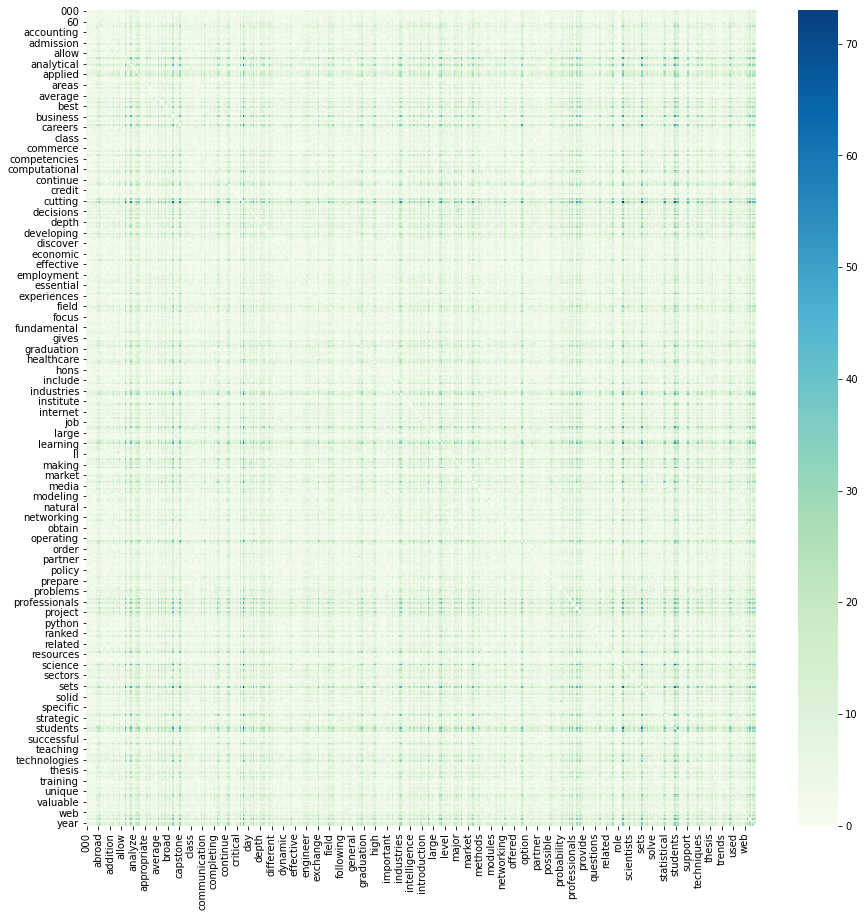

In [143]:
plt.figure(figsize = (15,15))
sns.heatmap(unigrams_cooc, cmap = 'GnBu')

In [150]:
get_common_cooccuring(unigrams_cooc, 65)

data - science
data - skills
data - students
science - data
skills - data
students - data


In [146]:
bigrams_cooc = get_cooccurence_matrix(min_df = 10, ngrams = (2,2), corpus = df['Merged_desc'])
bigrams_cooc.head()

,analytical skills,analytics data,artificial intelligence,bachelor degree,bachelor program,bachelor science,big data,business analytics,business intelligence,career opportunities,...,program outcome,project management,real life,real world,science data,science statistics,software development,study abroad,use data,wide range
analytical skills,0.0,3.0,3.0,2.0,1.0,2.0,6.0,3.0,4.0,3.0,...,1.0,2.0,1.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0
analytics data,3.0,0.0,5.0,4.0,3.0,4.0,6.0,4.0,2.0,6.0,...,1.0,1.0,1.0,5.0,3.0,1.0,1.0,2.0,1.0,3.0
artificial intelligence,3.0,5.0,0.0,7.0,6.0,4.0,18.0,4.0,8.0,16.0,...,9.0,7.0,3.0,7.0,8.0,2.0,5.0,3.0,4.0,9.0
bachelor degree,2.0,4.0,7.0,0.0,5.0,2.0,11.0,3.0,5.0,10.0,...,4.0,5.0,0.0,5.0,5.0,3.0,2.0,0.0,3.0,3.0
bachelor program,1.0,3.0,6.0,5.0,0.0,2.0,7.0,3.0,1.0,4.0,...,1.0,3.0,1.0,4.0,4.0,2.0,4.0,0.0,1.0,3.0


<AxesSubplot:>

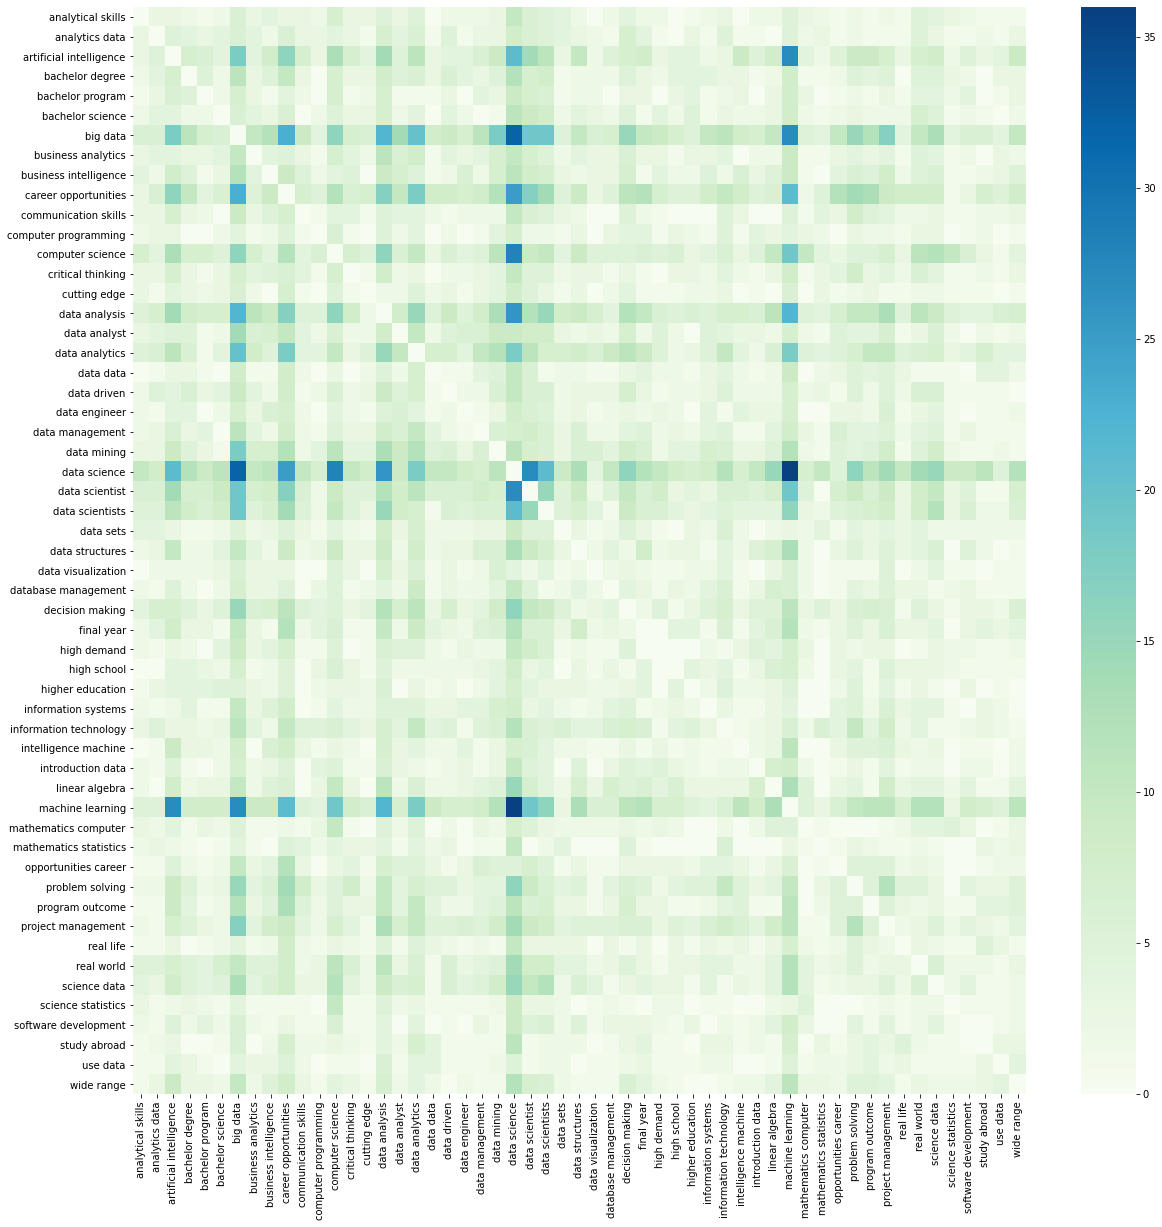

In [149]:
plt.figure(figsize = (20,20))
sns.heatmap(bigrams_cooc, cmap = 'GnBu')

In [152]:
get_common_cooccuring(bigrams_cooc, 25)

artificial intelligence - machine learning
big data - data science
big data - machine learning
computer science - data science
data analysis - data science
data science - big data
data science - computer science
data science - data analysis
data science - data scientist
data science - machine learning
data scientist - data science
machine learning - artificial intelligence
machine learning - big data
machine learning - data science


In [84]:
df.to_csv(export_name)

In [85]:
full ='interpersonal tasks, creativity, critical thinking, problem solving, decision making, empathy, teamwork, interdisciplinary skills, complex exercises, information exchange, problem solving, optimization, process know how, collaboration, innovation, coordination, service oriented, leadership competencies, independent decisions, social and communication skillsdecision making,, leadership skills, teamwork, collaboration, communication, respect ethics, environmental awareness, awareness for ergonomics, compromising, creating business networks, maintaining customer relationships, negotating, emotional intelligence, presentation, technical communication, literacy, economics, extract business value from social media, problem solving, optimization, analytical skillss, cognitive ability, life-long learning, knowledge management, innovationg, creativity, critical thinking, change management, business strategy, abstraction ability, managing complexity, project management, planning and organizing, management, customer orientation, customer relationship management, legislation awareness, safety awareness, individual responsibility, work in interdisciplinary environment, intercultural competency, flexibility, adaptability, work-life balance, self-management, business model understanding, entrepreneurshipcritical thinking, analytical thinking, problem solving, active learning, resiliency, stress handling, flexibility, digital competenciesadaptibility, innovation, creativity, courage to act in new situations, mental strength, resilince, self-organisation, proactivity, competence to manage team remotely, fast learning skillsmethodologies and metrics, digital ethics values, technical knowledge, ethical knowledge, ethical framework, conceptual synthesis, systematic reviews, traditional qualitative methods, ethical reasoning and decision making, critical thinking, ethical problem-solving, human multilevel engagement, handling  global digitalization consequences, systematic efforts, conceptual foundation and practical implications, evidence-based analytics, scientific inquiry, university discipline, psychosocial competence including self-management of one’s own identity, coping with negative consequence of digital immersion, CyberSecurity as it relates to personal and societal safety, and CyberEthics. ethical reasoning, academic achievements, coping intelligence and digital proficiency, modelling of digitalization riskspublic speaking, teaching, writing, curiosity, creativity, individual work, teamwork, english proficiencymathematical and statistical methods, big data analytics, relational data management, communication skills, teamwork, critical thinking, problem solving, data mining,  programing, quantitative skills, personal, inter-personal, and teamwork abilities such as drive, insightfulness, problem solving, communication, people skills, and working in teams.mathematics, statistics, computer skills, domain knowledge, and also hacking skills, programming and systems engineering expertise, research methods, business process management, design experiment, collect data, analyse data, identify patterns, hypothesise explanation, test hypothesis, theory buildingdata science analytics, statistical analysis, machine learning, data mining, business analyticsdata science engineering, software engineering, applications engineering, big data infrastructure and tools, data warehousingdata management, data governance, data stewardship, curation, and preservationresearch methods, project management, domain knowledge and expertisecomputing, mathematics, statistics, and computer science,computational thinking, statistical thinking, mathematical foundations, model building model assessment, algorithms, software foundations, data curation, knowledge transference, communication, responsibilityderiving value from data, data literacy, data governance, data ethics, technology, programming, data management, analytic planning, analytics, communicationplanning, organizing, problem solving, decision making, business fundamentals, customer focus, working with tools and technologydata security and privacyanalysis, presentation, artificial intelligence, big data systems, computing and computer fundamentals, data acquisition, data management, data governance, data mining, data privacy, data security, data integrity, machine learning, professionalism, programming, data structures, algorithms, software development, software maintenance'

In [86]:
len(full.split(', '))

203